### LSTM --(案例) 股票预测

![图片](LSTM-1.jpg)
![图片](LSTM-2.jpg)

## 细胞状态【--Ct--】
## 遗忘门【--Ft--】
## 更新门【--It--】
## 输出门【--Ot--】
#------------------------------

In [66]:
# 导入数据文件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# -------------------------------------
data = pd.read_csv('zgpa_train.csv')
# data.head()
price = data.close

price = (price-min(price))/(max(price)-min(price))

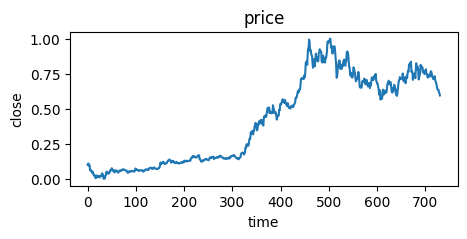

In [67]:
# ------------------------------------画图
plt.figure(figsize=(5,2))
plt.plot(price)
plt.title('price')
plt.xlabel('time')
plt.ylabel('close')
plt.show()

In [68]:
print(price.shape)

(731,)


In [69]:
# ---------------------------------------
def data_split(x,sqe_len):
    data_raw = x.to_numpy()
    data = []
    for i in range(len(data_raw)-sqe_len):
        data.append(data_raw[i:i+sqe_len])     # 20
    data = np.array(data)
    test_size = int(np.round(0.2*data.shape[0]))
    train_size = data.shape[0]-(test_size)
    
    x_train = data[:train_size,:-1]
    y_train = data[:train_size,-1]
    x_test = data[train_size:,:-1]
    y_test = data[train_size:,-1]
    return [x_train, y_train, x_test, y_test]

In [70]:
x_train, y_train, x_test, y_test = data_split(price,20)
print(x_train.shape)
print(x_train[0])
print(y_train.shape)

(569, 19)
[0.09902724 0.1077821  0.10836576 0.09357977 0.09688716 0.05972763
 0.06322957 0.05894942 0.05894942 0.04357977 0.04105058 0.04961089
 0.03054475 0.02315175 0.02451362 0.02529183 0.00525292 0.00505837
 0.00661479]
(569,)


##  构建模型

In [71]:
import torch
import torch.nn as nn
# -------------------------------
x_train = torch.from_numpy(x_train).float().unsqueeze(-1)
y_train = torch.from_numpy(y_train).float().unsqueeze(-1)
# ------------------------------------------------------
input_dim = 1                # 输入维度
hidden_dim = 100               # 隐藏层维度
num_layers = 1              # 隐藏层个数
output_dim = 1                # 输出维度
# epoch = 100
# -------------------------------------------------------


In [72]:
print(x_train.shape)

print(y_train.shape)


torch.Size([569, 19, 1])
torch.Size([569, 1])


![图片](lstm-para.jpg)

In [73]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim,num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(num_layers, x.shape[0], hidden_dim).requires_grad_()
        c0 = torch.zeros(num_layers, x.shape[0], hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x,(h0.detach(),c0.detach()))
        out = self.fc(out[:,-1,:])
        return out

## 训练

In [74]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim,output_dim=output_dim,num_layers=num_layers)
criterion = nn.MSELoss()                            # 计算两个列表的均方误差
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [75]:
loss_list = []
model.train()
def train():
    for epoch in range(100):                          # 前面定义了epoch为100轮
        y_out = model(x_train)
        loss = criterion(y_out, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print('Epoch: ', epoch, 'Loss: ', loss.item())
        loss_list.append(loss.item())
        
train()    


Epoch:  0 Loss:  0.15661202371120453
Epoch:  1 Loss:  0.1449575424194336
Epoch:  2 Loss:  0.13379254937171936
Epoch:  3 Loss:  0.12309030443429947
Epoch:  4 Loss:  0.11286317557096481
Epoch:  5 Loss:  0.10313297808170319
Epoch:  6 Loss:  0.09395112842321396
Epoch:  7 Loss:  0.08543460071086884
Epoch:  8 Loss:  0.07781968265771866
Epoch:  9 Loss:  0.07153709977865219
Epoch:  10 Loss:  0.06726349890232086
Epoch:  11 Loss:  0.06573014706373215
Epoch:  12 Loss:  0.06673410534858704
Epoch:  13 Loss:  0.06787469983100891
Epoch:  14 Loss:  0.06636456400156021
Epoch:  15 Loss:  0.06201887130737305
Epoch:  16 Loss:  0.05653368681669235
Epoch:  17 Loss:  0.05146704986691475
Epoch:  18 Loss:  0.04742947220802307
Epoch:  19 Loss:  0.04427020996809006
Epoch:  20 Loss:  0.041507821530103683
Epoch:  21 Loss:  0.03861893713474274
Epoch:  22 Loss:  0.03516026586294174
Epoch:  23 Loss:  0.03082934021949768
Epoch:  24 Loss:  0.025595486164093018
Epoch:  25 Loss:  0.020104452967643738
Epoch:  26 Loss:  0.

In [76]:
print(loss_list)

[0.15661202371120453, 0.1449575424194336, 0.13379254937171936, 0.12309030443429947, 0.11286317557096481, 0.10313297808170319, 0.09395112842321396, 0.08543460071086884, 0.07781968265771866, 0.07153709977865219, 0.06726349890232086, 0.06573014706373215, 0.06673410534858704, 0.06787469983100891, 0.06636456400156021, 0.06201887130737305, 0.05653368681669235, 0.05146704986691475, 0.04742947220802307, 0.04427020996809006, 0.041507821530103683, 0.03861893713474274, 0.03516026586294174, 0.03082934021949768, 0.025595486164093018, 0.020104452967643738, 0.016572745516896248, 0.017601991072297096, 0.015169299207627773, 0.010199996642768383, 0.009504622779786587, 0.010817130096256733, 0.010743191465735435, 0.00875376258045435, 0.0073148999363183975, 0.009508023038506508, 0.00951674859970808, 0.007770317140966654, 0.00858699157834053, 0.009482413530349731, 0.008775511756539345, 0.007530943024903536, 0.007524025160819292, 0.007895924150943756, 0.006947426591068506, 0.00609459588304162, 0.006065951660

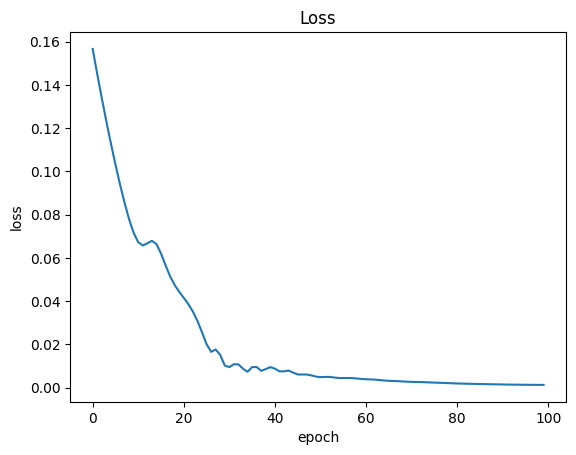

In [77]:
fig = plt.figure()
plt.plot(loss_list)
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##### 这里没有做数据归一化处理，所以损失值比较大

# 预测


In [78]:
model.eval()
x_test= torch.from_numpy(x_test).float().unsqueeze(-1)
out_pre = model(x_test)


In [79]:
out_pre = out_pre.detach().numpy()
out_pre = np.ravel(out_pre)
y_test = np.ravel(y_test)
print(out_pre)


[0.6894601  0.6911505  0.6952809  0.69845474 0.7024557  0.7045999
 0.7073774  0.711685   0.7158234  0.720572   0.7253007  0.72550434
 0.72453886 0.7218259  0.718671   0.71316016 0.70670027 0.69779634
 0.68746    0.68065494 0.668889   0.65903264 0.64896905 0.6396194
 0.63381815 0.63247234 0.631116   0.6284141  0.6277352  0.6277493
 0.62720054 0.62704176 0.6267011  0.6278523  0.63316375 0.6395486
 0.6474171  0.6558451  0.6610324  0.6660723  0.6712044  0.67613894
 0.67730373 0.6747172  0.6701676  0.66558164 0.66439277 0.6616658
 0.66292703 0.6648279  0.6653359  0.664764   0.66022897 0.65458584
 0.6482698  0.6442115  0.6436513  0.64699095 0.653166   0.6601961
 0.6688275  0.67665726 0.68415564 0.69113666 0.6969973  0.70124865
 0.70859337 0.71193033 0.7129773  0.7159373  0.7176588  0.7188526
 0.71780574 0.7194406  0.7226139  0.72437435 0.7283645  0.73405975
 0.73919755 0.74834734 0.7572336  0.76682526 0.77443    0.78324336
 0.7850947  0.7853028  0.78459865 0.77886385 0.7755811  0.7718232
 0.

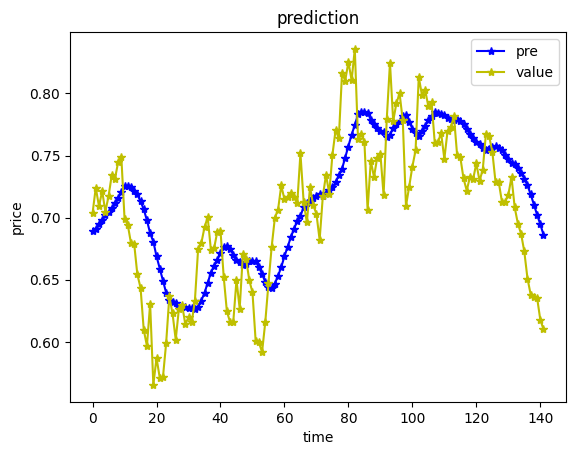

In [80]:
fig2 = plt.figure()
plt.plot(out_pre,'*-b',label='pre')
plt.plot(y_test,'*-y',label='value')
plt.title('prediction')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

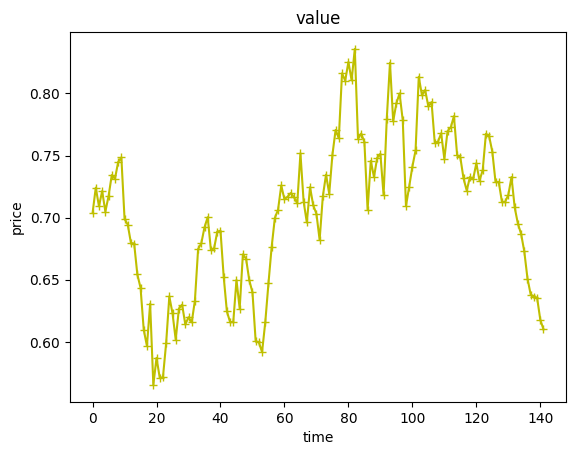

In [81]:
fig3 = plt.figure()
plt.plot(y_test,'+-y')
plt.title('value')
plt.xlabel('time')
plt.ylabel('price')
plt.show()